In [1]:
"""Anchor utils modified from https://github.com/biubug6/Pytorch_Retinaface"""
import math
import tensorflow as tf
import numpy as np
from itertools import product as product

In [2]:
###############################################################################
#   Tensorflow / Numpy Priors                                                 #
###############################################################################
def prior_box(image_sizes, min_sizes, steps, clip=False):
    """prior box"""
    feature_maps = [
        [math.ceil(image_sizes[0] / step), math.ceil(image_sizes[1] / step)]
        for step in steps]

    anchors = []
    for k, f in enumerate(feature_maps):
        for i, j in product(range(f[0]), range(f[1])):
            for min_size in min_sizes[k]:
                s_kx = min_size / image_sizes[1]
                s_ky = min_size / image_sizes[0]
                cx = (j + 0.5) * steps[k] / image_sizes[1]
                cy = (i + 0.5) * steps[k] / image_sizes[0]
                anchors += [cx, cy, s_kx, s_ky]

    output = np.asarray(anchors).reshape([-1, 4])

    if clip:
        output = np.clip(output, 0, 1)

    return output



In [3]:
#widerface input size
#input_size = 640

#AFLW input size
input_size = 450

# anchor setting
min_sizes = [[16, 32], [64, 128], [256, 512]]
steps = [8, 16, 32]
clip = False


In [4]:
# define prior box
priors = prior_box((input_size, input_size),
                   min_sizes,  steps, clip)


In [5]:
priors.shape

(8630, 4)

In [6]:
type(priors)

numpy.ndarray

In [7]:
def _point_form(boxes):
    """ Convert prior_boxes to (xmin, ymin, xmax, ymax)
    representation for comparison to point form ground truth data.
    Args:
        boxes: (tensor) center-size default boxes from priorbox layers.
    Return:
        boxes: (tensor) Converted xmin, ymin, xmax, ymax form of boxes.
    """
    return tf.concat((boxes[:, :2] - boxes[:, 2:] / 2,
                      boxes[:, :2] + boxes[:, 2:] / 2), axis=1)

In [8]:
priors2 = _point_form(priors)

In [9]:
priors2 = np.asarray(priors2)

In [10]:
priors2 = priors2.reshape(-1,1)

In [11]:
priors2.shape

(34520, 1)

In [12]:
from matplotlib import pyplot as plt

In [13]:
np.mean(priors2)

0.5097896227629716

In [14]:
np.var(priors2)

0.10022917251323052

In [15]:
np.max(priors2)

1.6

In [16]:
np.min(priors2)

-0.5333333333333333

In [17]:
#!conda install seaborn

In [18]:
import seaborn as sns

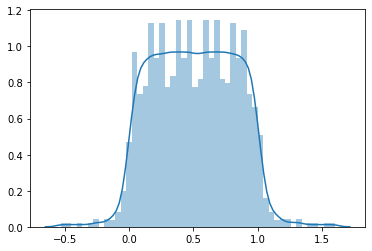

In [19]:
sns.distplot(priors2)

(array([  90.,  208., 3612., 6986., 7134., 7104., 6958., 2128.,  180.,
         120.]),
 array([-0.53333333, -0.32      , -0.10666667,  0.10666667,  0.32      ,
         0.53333333,  0.74666667,  0.96      ,  1.17333333,  1.38666667,
         1.6       ]),
 <a list of 10 Patch objects>)

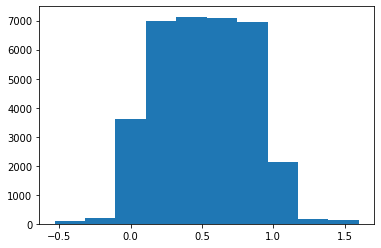

In [22]:
plt.hist(priors2)